In [3]:
from bs4 import BeautifulSoup
import requests, lxml, json, re, datetime, sys

sys.path.append('C:\\Users\\jinfe\\Documents\\GitHub\\python_functions\\jl_nlp_pkg')
sys.path.append('C:\\Users\\jinfe\\Documents\\GitHub\\python_functions\\jl_model_explain_pkg')


import nlpbasic.textClean as textClean
import nlpbasic.docVectors as DocVector
import nlpbasic.dataExploration as DataExploration
import nlpbasic.lda as lda
import nlpbasic.tfidf as tfidf
import nlpbasic.text_summarize as txtsmr
import nlpbasic.word_embedding as wdembd

import model_explain.plot as meplot
import model_explain.shap as meshap

import data_visualization.distribution_plot as dbplot

import pandas as pd
from datetime import date
import calendar


c:\Users\jinfe\anaconda3\envs\env-nlp\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Get most watched news



1. How to get user-agent: 

In [ ]:
# How to get user-agent: 
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from fake_useragent import UserAgent
import time

# options = Options() 
# options.add_argument(f'user-agent={UserAgent().random}')
# driver = webdriver.Chrome(chrome_options=options) 
driver = webdriver.Chrome() 
driver.get("http://www.whatsmyua.info/")

time.sleep(5)
driver.execute_cdp_cmd("Network.enable", {}) 
driver.execute_cdp_cmd("Network.setExtraHTTPHeaders", {"headers": {"User-Agent": f"{UserAgent().random}"}}) 
driver.get ("http://www.whatsmyua.info/")

2. **Set Parameters**

In [55]:

headers = {
    # 'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36'
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36'
}

url = 'https://www.bbc.com/news'
news_offset = 'rlp9r65s-1'
n_loop = 6


3. Find out div string and news related string

In [57]:
from urllib.parse import urljoin
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")
most_watch = soup.find('div', class_='sc-93223220-0 dqzStA')
most_watch



<div class="sc-93223220-0 dqzStA" data-testid="illinois-grid-5"><div data-testid="cambridge-card"><div data-testid="anchor-inner-wrapper"><a class="sc-2e6baa30-0 gILusN" data-testid="internal-link" href="/news/videos/cx028eq4qg1o"><div class="sc-f1f2a354-0 claiQG" data-testid="cambridge-video"><span class="sc-f1f2a354-1 fDznqs" data-testid="card-order">1<!-- --></span><div class="sc-4fedabc7-1 iqyyKX"><div class="sc-4fedabc7-0 kZtaAl"><div class="sc-4d9540e7-1 sc-4fedabc7-2 cfxUiL VXtRF"><svg category="playback-avkx" class="sc-1097f7fe-0 jmthjj" data-testid="inline-icon" height="3em" icon="play" viewbox="0 0 32 32" width="3em"><path d="M29 16 5.8 1v30L29 16z"></path></svg></div><h2 class="sc-4fedabc7-3 gJvjEE" data-testid="card-headline">Watch: Biden’s disastrous few weeks... in 90 seconds<!-- --></h2></div></div></div></a></div></div><div data-testid="cambridge-card"><div data-testid="anchor-inner-wrapper"><a class="sc-2e6baa30-0 gILusN" data-testid="internal-link" href="/news/videos/

In [58]:
heading = soup.find_all('h2', class_="sc-4fedabc7-3 gJvjEE")
heading

[<h2 class="sc-4fedabc7-3 gJvjEE" data-testid="card-headline">Watch: Biden’s disastrous few weeks... in 90 seconds<!-- --></h2>,
 <h2 class="sc-4fedabc7-3 gJvjEE" data-testid="card-headline">Watch: Democrats in Michigan react to Biden dropping out<!-- --></h2>,
 <h2 class="sc-4fedabc7-3 gJvjEE" data-testid="card-headline">Watch: How US President Joe Biden's bid for re-election came to an end<!-- --></h2>,
 <h2 class="sc-4fedabc7-3 gJvjEE" data-testid="card-headline">'Drill, baby, drill' - At the RNC as Trump charmed crowd<!-- --></h2>,
 <h2 class="sc-4fedabc7-3 gJvjEE" data-testid="card-headline">Watch: Spire collapses as fire engulfs Texas church<!-- --></h2>,
 <h2 class="sc-4fedabc7-3 gJvjEE" data-testid="card-headline">Couple found dead after trying to cross Atlantic<!-- --></h2>,
 <h2 class="sc-4fedabc7-3 gJvjEE" data-testid="card-headline">Who could challenge Harris - or be her running mate?<!-- --></h2>,
 <h2 class="sc-4fedabc7-3 gJvjEE" data-testid="card-headline">Biden drops ou

4. Find out all headings and images

In [105]:
# find all headings
headings = []
for item in set(soup.find_all('div')):
    heading = item.find('h2')
    if heading is not None:
        headings.append(heading.text)

headings

["Biden's momentous and 'closely-held' decision surprises own aides",
 'Republicans call on Biden to leave White House',
 'Boat fire off Haiti kills at least 40 migrants, UN says',
 'Two down, two to go - Schauffele eyes slam after Open triumph',
 'Alert issued in India after boy dies from high risk Nipah virus',
 'Trump shooter flew drone above rally site ahead of time - US media ',
 'Biden has endorsed Harris. What happens next?',
 'Alert issued in India after boy dies from high risk Nipah virus',
 '‘I wanted my clitoris back’ –  FGM survivor opts for reconstructive surgery',
 'What Biden quitting means for Harris, the Democrats and Trump',
 'Watch: Spire collapses as fire engulfs Texas church',
 'Watch: Democrats in Michigan react to Biden dropping out',
 'Humphries beats Van Gerwen to win Matchplay title',
 'Couple found dead after trying to cross Atlantic',
 'Watch: Democrats in Michigan react to Biden dropping out',
 'Alert issued in India after boy dies from high risk Nipah viru

In [101]:
# find all images
tags = []

for img in set(soup.find_all('img')):
    if 'alt' in img.attrs:
        tags.append(img.attrs['alt'])

for item in set(soup.find_all('div')):
    for img in item.find_all('img'):
        if 'alt' in img.attrs:
            tags.append(img.attrs['alt'])

len(tags)
tags

['Lando Norris at the Hungarian Grand Prix',
 'US President Joe Biden',
 'Kamala Harris',
 'US President Joe Biden and Vice-President Kamala Harris',
 'Biden speaks at a rally',
 'An aerial view of the Butler Farm Show grounds, where Donald Trump survived an assassination attempt',
 'Kimberly Cheatle',
 'Joe Biden with House Speaker Mike Johnson',
 'Joe Biden takes the oath of office as Jill Biden holds his bible',
 'People enjoy a day at the beach in Santa Pola, Alicante',
 'Jay Slater image with Spanish police searching for him in mountains',
 'Xander Schauffele and father Steffan',
 'Tadej Pogacar celebrates',
 'Harris and Biden in 2020',
 'A picture of Bella Hadid',
 'Russian blogger Anna Bazhutova, charged with spreading "fake information" on the Russian army in a Moscow court in June 2024',
 'Newsom, Whitmer and Buttigieg',
 'A view of Cap-Haitien in Haiti',
 'Woman with glasses and nose ring',
 'Xander Schauffele with the Claret Jug after winning the 2024 Open at Royal Troon',
 

In [110]:
# find all p
p = []
for item in set(soup.find_all('div')):
    heading = item.find('p')
    if heading is not None:
        p.append(heading.text)
for item in set(soup.find_all('p')):
    if item is not None:
        p.append(item.text)
p = set(p)
p

{'"If Joe Biden is not fit to run for president, he is not fit to serve as president," said House Speaker Mike Johnson.',
 "A clean-up team removed four bodies from the Himalayas in this year's operation.",
 'A cross-cultural love story is shining a light on a secretive and glamorous Asian world.',
 'A mass IT outage has caused chaos around the world, with major airlines among the victims.',
 'A show in Delhi showcases colourful, rare artworks of colonial India by well-known foreign artists.',
 'Activists say spiralling housing costs are due to properties being bought by foreigners - or rented over the summer.',
 'Captain Ben Stokes says Shoaib Bashir “has shown the world what he can do” after bowling England to victory in the second Test against West Indies.',
 'Copyright 2024 BBC. All rights reserved.\xa0\xa0The BBC is not responsible for the content of external sites.\xa0Read about our approach to external linking.',
 'Democratic voters in Michigan give their take on Joe Biden withd

['watch', 'sport', 'read', 'top', 'feature', 'news', 'also', 'analysis', 'drill', 'story', 'wish', 'taliban', 'afghanistan', 'line', 'lose', 'give', 'react', 'endorse', 'next', 'happens', 'second', 'disastrous', 'week', 'show', 'bashir', 'quit', 'mean', 'upend', 'race', 'fightback', 'tourism', 'spanish', 'record', 'run', 'challenge', 'mate', 'call', 'leave', 'michigan', 'withdrawal', 'letter', 'announce', 'rise', 'hold', 'troon', 'hour', 'shook', 'inch', 'america', 'slater']


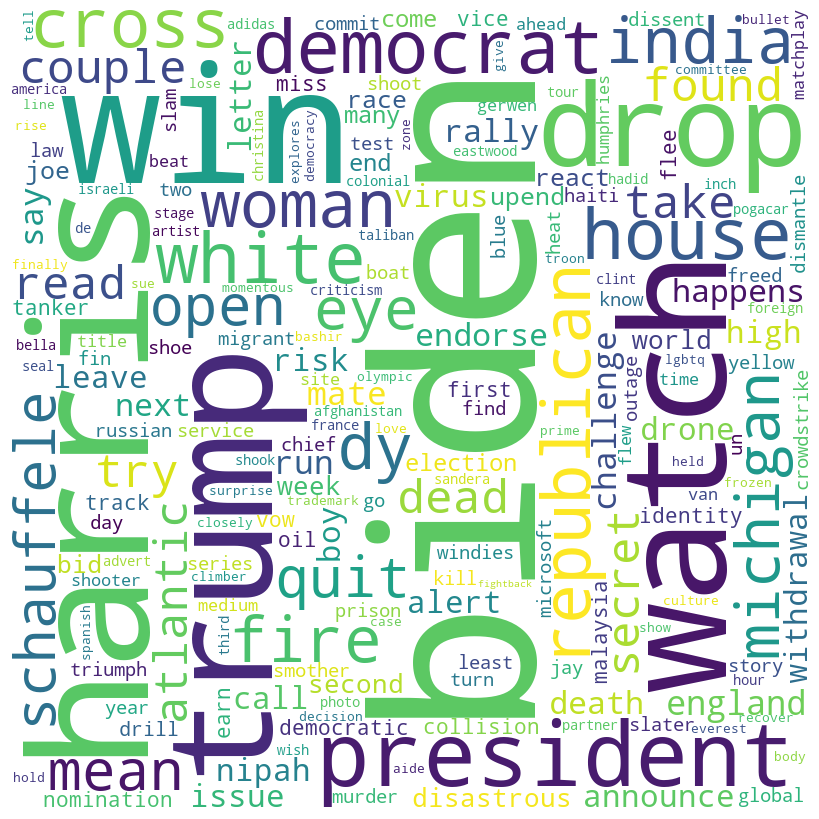

C:\Users\jinfe\Documents\GitHub\python_functions\jl_nlp_pkg\nlpbasic\lda.py:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  toptopic = toptopic.applymap(lambda x: re.search('"(.*)"', x).group(1))


,Topics,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10
0,1,president,woman,identity,many,vice,first,secret,trump,heat,chief
1,2,biden,white,house,dy,nipah,india,boy,high,alert,risk
2,3,trump,biden,harris,quit,mean,democrat,win,flee,miss,collision
3,4,biden,harris,challenge,could,mate,run,trump,president,watch,joe
4,5,president,win,biden,read,announce,withdrawal,letter,dissent,shoe,russian
5,6,watch,biden,disastrous,week,second,prison,year,commit,murder,freed
6,7,harris,biden,endorse,happens,next,day,find,jay,slater,take
7,8,death,drop,watch,adidas,advert,israeli,criticism,bella,hadid,spanish
8,9,biden,drop,cross,atlantic,couple,dead,try,found,win,watch
9,10,win,france,pogacar,seal,tour,de,third,stage,sandera,christina


In [114]:
newstokens = textClean.pipeline(headings, multi_gram = [1], lower_case=True, 
                                              deacc=False, encoding='utf8', errors='strict', stem_lemma = 'lemma', 
                                              tag_drop = [], 
                                              nltk_stop=True, 
                                              stop_word_list=[], 
                                              check_numbers=False, word_length=2, remove_consecutives=True)

top_n_keywords = tfidf.get_top_n_tfidf_bow(newstokens, no_below = 2,top_n_tokens = 50)
print(top_n_keywords)
DataExploration.generate_word_cloud(newstokens)
lda_allbow, bow_corpus, dictionary = lda.fit_lda(newstokens,no_below = 1, num_topics = 10)
lda.lda_topics(lda_allbow)

In [116]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_allbow, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.152876 -0.155534       1        1  12.532449
1     -0.014691  0.192376       2        1  12.196351
0     -0.103729  0.014528       3        1  11.975972
2      0.099531 -0.135011       4        1  11.672348
4      0.184368 -0.008494       5        1  11.119456
8      0.196596 -0.067707       6        1   9.805638
7      0.142837  0.090667       7        1   9.333598
5     -0.101964  0.205159       8        1   8.847409
6     -0.124128 -0.158555       9        1   7.737387
9     -0.125944  0.022571      10        1   4.779392, topic_info=           Term       Freq      Total Category  logprob  loglift
75          win  46.000000  46.000000  Default  30.0000  30.0000
11        white  22.000000  22.000000  Default  29.0000  29.0000
8         house  22.000000  22.000000  Default  28.0000  28.0000
66         drop  36.000000  36.000000  Default  27.0000  27.0000
47       harris  47.000000  47.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
10   republican   0.593490  20.559487  Topic10  -5.3089  -0.5042
125       woman   0.593471  19.600017  Topic10  -5.3089  -0.4564
132      prison   0.593456   9.350422  Topic10  -5.3090   0.2836
130       freed   0.593453   9.350377  Topic10  -5.3090   0.2836
131      murder   0.593451   9.350392  Topic10  -5.3090   0.2836

[388 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
189       7  0.826189       adidas
189      10  0.137698       adidas
190       7  0.826190       advert
190      10  0.137698       advert
94        1  0.802729  afghanistan
...     ...       ...          ...
209       7  0.103243       yellow
158       3  0.721345        yemen
201       5  0.155181         zone
201       6  0.155181         zone
201       7  0.620723         zone

[489 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3, 5, 9, 8, 6, 7, 10])

In [159]:
selected_words = top_n_keywords
corseid = list(today_news['index'])
tfidf_data = tfidf.get_tfidf_dataframe(today_news['title_tokens'], doc_index = corseid, no_below =1, no_above = 0.5, keep_n = 100000)

filter_data = tfidf_data[tfidf_data.bow.isin(selected_words)]
test = DataExploration.get_similarity_cosin(tfidf_data, filter_data, 'bow', doc_key = 'doc_id', filterbase='base')#, comp_col = 'tfidf_value', topn_output = 10)
recommend_news_index = today_news[today_news.index.isin(test.compareindex.to_list())].index.to_list()

for i in recommend_news_index:
    print(today_news[today_news.index==i]['title'].values[0])
#     print(today_news[today_news.index==i]['content'].values[0])
    print('----------------------------------------')

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Send your kids to border, then call Pak PM brother: Gambhir to Sidhu
----------------------------------------
China's birth rate fell below 1% in 2020, lowest in 43 years
----------------------------------------
Farewell for now, West Bengal BJP: Senior BJP leader Tathagata Roy
----------------------------------------
Husband, 3 others arrested for killing 33-year-old woman in Delhi
----------------------------------------
Woman kills father of her daughter as he marries her daughter from 1st marriage in Mumbai
----------------------------------------
Govt releases list of cleanest states in India
----------------------------------------
China Evergrande's EV unit to raise $347 million from share sale
----------------------------------------
Fake stamp papers worth ₹63 lakh seized in Bengaluru; 5 arrested
----------------------------------------
It doesn't really matter: Kartik on being pitted against Vicky, Varun
----------------------------------------
Fraud-accused Theranos Founder 